
    
In this Project our goal is to identify a relationship between different features of a mobile phone, such as RAM and internal memory, and its selling price. Our objective is not to predict the actual price of a mobile phone, but to determine a price range that indicates how high the price is likely to be.

    
## Dataset:

Dataset columns are as follows:
- **id** - ID
- **battery_power** - Total energy a battery can store in one time measured in mAh
- **blue** - Has bluetooth or not
- **clock_speed** - Speed at which microprocessor executes instructions
- **dual_sim** - Has dual sim support or not
- **fc** - Front Camera mega pixels
- **four_g** - Has 4G or not
- **int_memory** - Internal Memory in Gigabytes
- **m_dep** - Mobile Depth in cm
- **mobile_wt** - Weight of mobile phone
- **n_cores** - Number of cores of processor
- **pc** - Primary Camera mega pixels
- **px_height** - Pixel Resolution Height
- **px_width** - Pixel Resolution Width
- **ram** - Random Access Memory in Megabytes
- **sc_h** - Screen Height of mobile in cm
- **sc_w** - Screen Width of mobile in cm
- **talk_time** - Longest time that a single battery charge will last when you are
- **three_g** - Has 3G or not
- **touch_screen** - Has touch screen or not
- **wifi** - Has wifi or not    
- **price_range** - This is the target variable with value of:
    - 0 (low cost)
    - 1 (medium cost)
    - 2 (high cost)
    - 3 (very high cost)

    
    
## Objectives:

- Exploring and Preprocessing Data
- Build  classification model to predict the mobile phone price range



## Table of Contents:

* Import Libraries
* Read Dataset
*  Dataset Overview
    - Statistical Description of Categorical Variables
    - Statistical Description of Numerical Variables

* Data Cleansing
    -  Duplicate Values Detection
    - Missing Value Detection
    - Noise Detection
    -  Feature Selection
        - Pearson Correlation
        - Drop-column Feature Importance

* Decision Tree Model Building
    - Noise Treatment using KNN Imputer
    -  Decision Tree Hyperparameter Tuning
    -  Decision Tree Feature Subset Selection
    -  Decision Tree Model Evaluation

* Conclusion
    


##Import libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from matplotlib import colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.base import clone
from sklearn.impute import KNNImputer
%matplotlib inline
warnings.filterwarnings('ignore')

## Read Dataset

In [7]:
df = pd.read_csv('/content/mobile_train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


##Dataset Overview

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc



* This dataset contains information from __2000__ mobile phones.
* We have __21 variables__ including __20 independent variables__ and __1 dependent variable__ which is __price_range__.
* There is no __missing value__ in the dataset.
* We have __8 categorical variables__: `n_cores` , `price_range`, `blue`, `dual_sim`, `four_g`, `three_g`, `touch_screen`, `wifi`
* We have __13 numeric variables__: `battery_power`, `clock_speed`, `fc`, `int_memory`, `m_dep`, `mobile_wt`, `pc`, `px_height`, `px_width`, `ram`, `talk_time`, `sc_h`, `sc_w`

### Statistical Description of Categorical Variables

In [9]:
# Filter out categorical features
df_categorical = df[['price_range', 'n_cores', 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']].astype(str)

# Calculate number of unique values and unique values for each feature
unique_counts = df_categorical.nunique()
unique_values = df_categorical.apply(lambda x: x.unique())

# Create new dataframe with the results
pd.DataFrame({'Number of Unique Values': unique_counts, 'Unique Values': unique_values})

,Number of Unique Values,Unique Values
price_range,4,"[1, 2, 3, 0]"
n_cores,8,"[2, 3, 5, 6, 1, 8, 4, 7]"
blue,2,"[0, 1]"
dual_sim,2,"[0, 1]"
four_g,2,"[0, 1]"
three_g,2,"[0, 1]"
touch_screen,2,"[0, 1]"
wifi,2,"[1, 0]"


### Statistical Description of Numerical Variables

In [10]:
# Filter out numerical features
df_numerical = df.drop(df_categorical.columns, axis=1)

# Generate descriptive statistics
df_numerical.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.5,439.4,501.0,851.8,1226.0,1615.2,1998.0
clock_speed,2000.0,1.5,0.8,0.5,0.7,1.5,2.2,3.0
fc,2000.0,4.3,4.3,0.0,1.0,3.0,7.0,19.0
int_memory,2000.0,32.0,18.1,2.0,16.0,32.0,48.0,64.0
m_dep,2000.0,0.5,0.3,0.1,0.2,0.5,0.8,1.0
mobile_wt,2000.0,140.2,35.4,80.0,109.0,141.0,170.0,200.0
pc,2000.0,9.9,6.1,0.0,5.0,10.0,15.0,20.0
px_height,2000.0,645.1,443.8,0.0,282.8,564.0,947.2,1960.0
px_width,2000.0,1251.5,432.2,500.0,874.8,1247.0,1633.0,1998.0
ram,2000.0,2124.2,1084.7,256.0,1207.5,2146.5,3064.5,3998.0


## Data Cleaning

### Duplicate Values Detection

In [11]:
df.duplicated().sum()

np.int64(0)

Conclusion:

* The dataset does not contain duplicate samples.

### Missing Value Detection

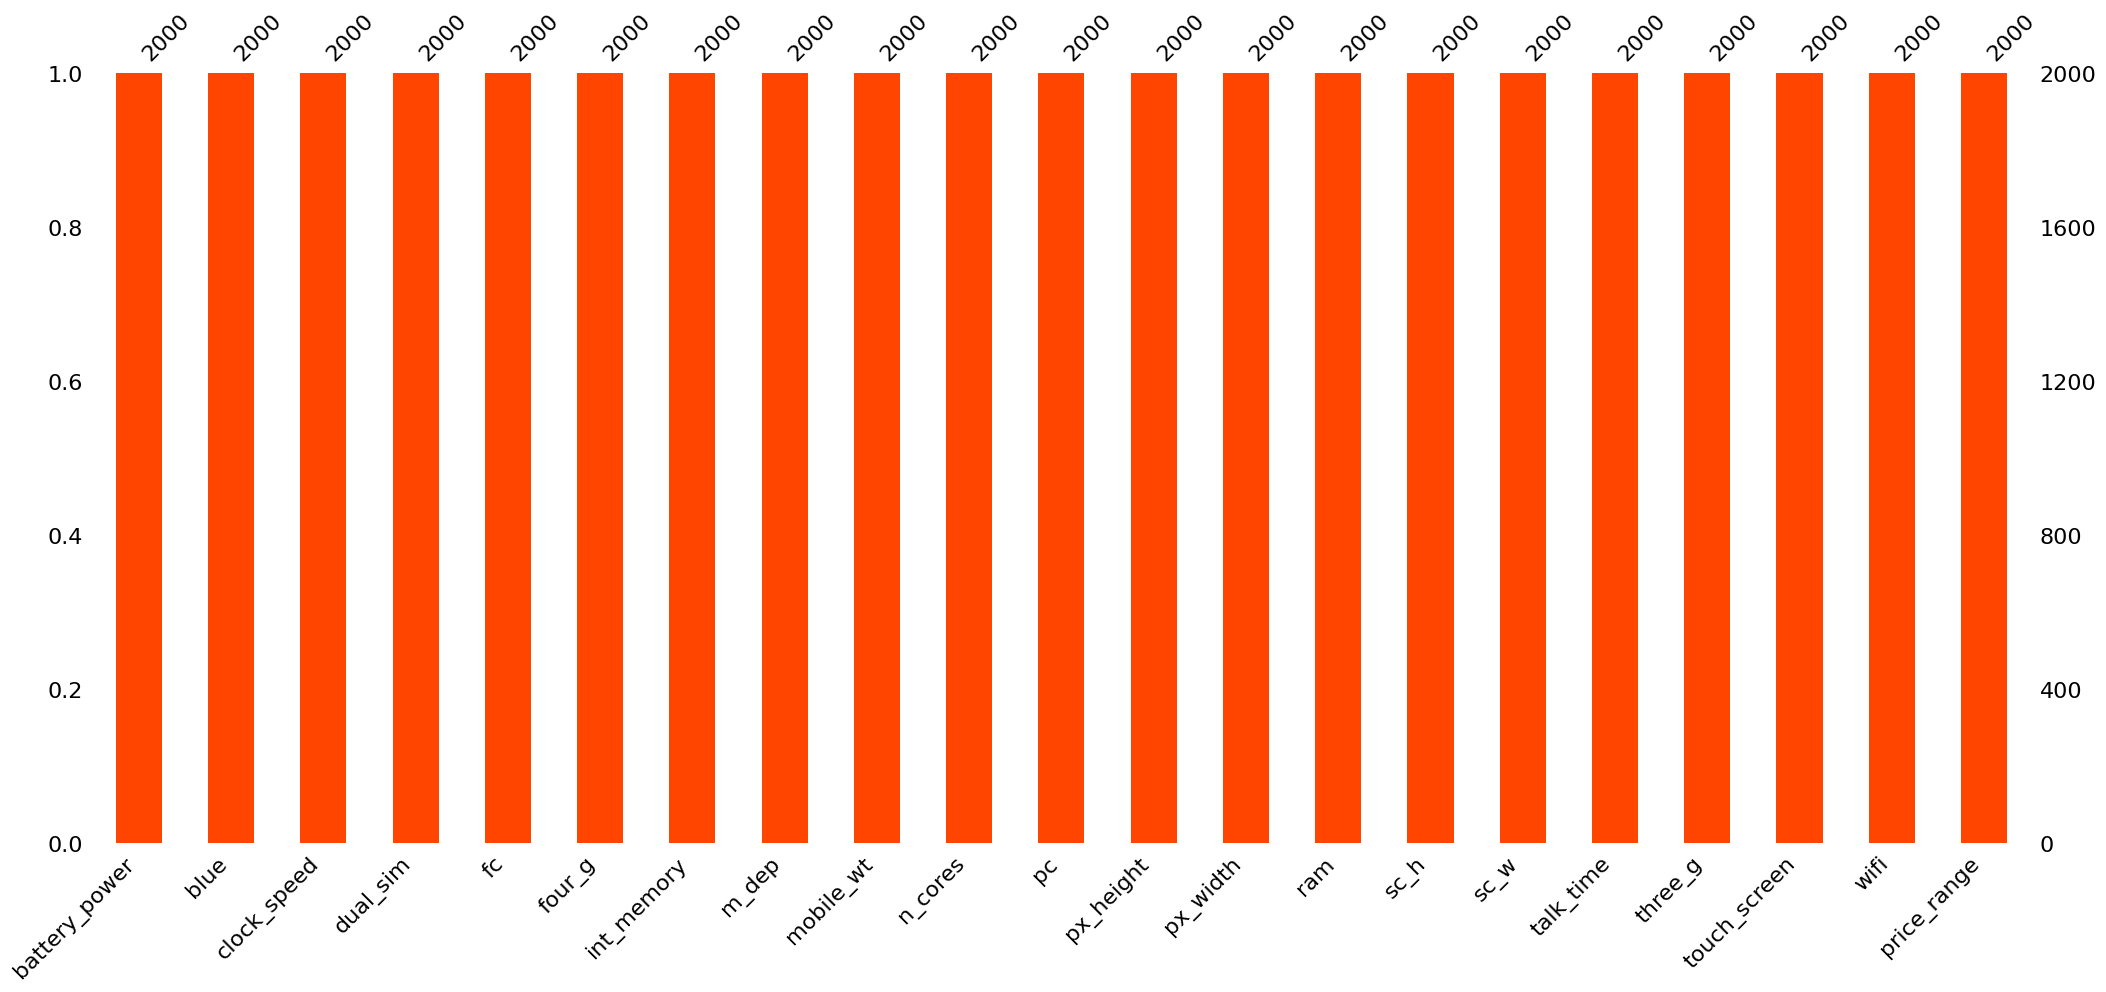

In [12]:
# Generate the missing values matrix using missingno.bar()
msno.bar(df, color='orangered')

# Display the plot
plt.show()

Conclusion:

* There is no missing value in the dataset

### Noise Detection

Let's take a look at `px_height` (Pixel Resolution Height) and `sc_w` (Screen Width of mobile in cm) feature distributions again:

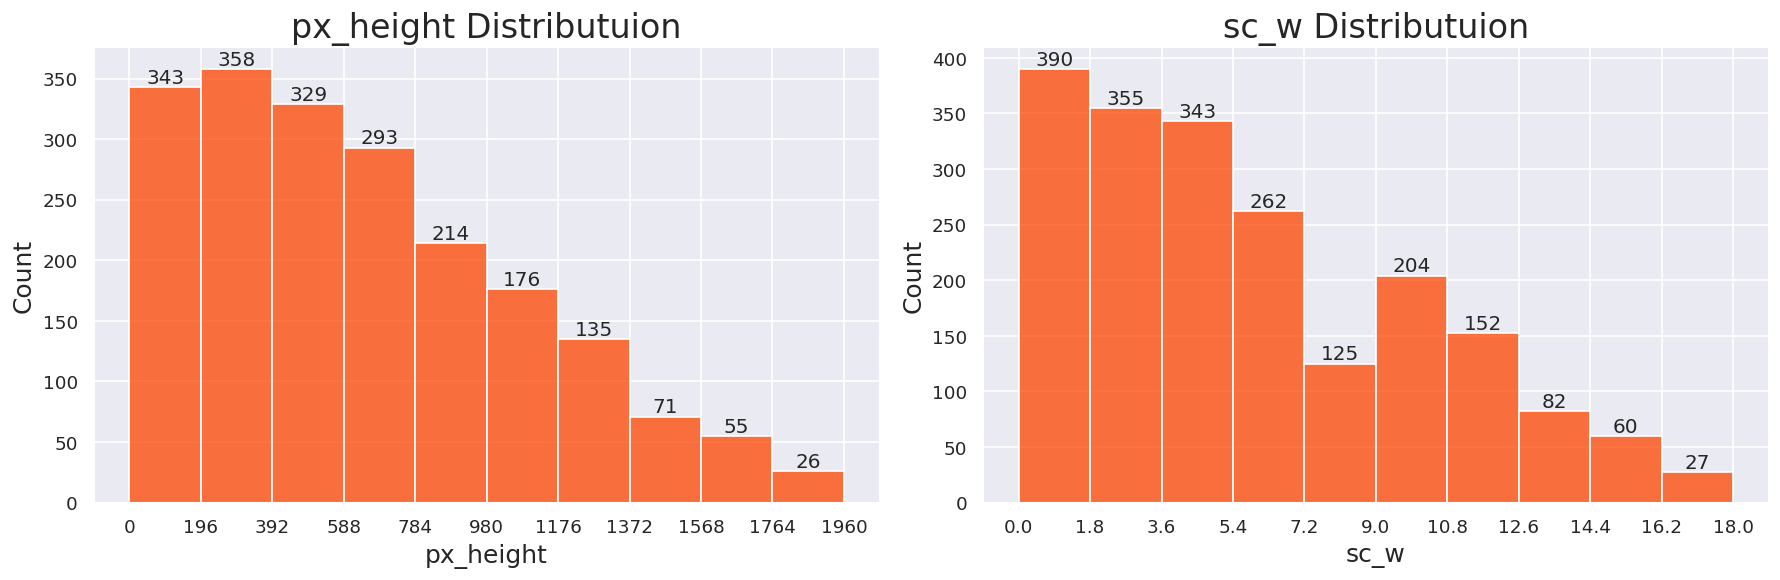

In [13]:
sns.set(rc = {'axes.labelsize' : 15})
fig, ax = plt.subplots(1, 2, figsize=(15,5), dpi=120)

# Plot px_height histogram:
_, bin_edges = np.histogram(df['px_height'], range=(np.floor(df['px_height'].min()), np.ceil(df['px_height'].max())))
graph1 = sns.histplot(x='px_height', data=df, bins=bin_edges, color='orangered', ax=ax[0])
ax[0].set_xticks(np.round(bin_edges,1))
ax[0].set_title('px_height Distributuion', fontsize=20)
for cont in graph1.containers:
        graph1.bar_label(cont)

# Plot sc_w histogram:
_, bin_edges = np.histogram(df['sc_w'], range=(np.floor(df['sc_w'].min()), np.ceil(df['sc_w'].max())))
graph2 = sns.histplot(x='sc_w', data=df, bins=bin_edges, color='orangered', ax=ax[1])
ax[1].set_xticks(np.round(bin_edges,1))
ax[1].set_title('sc_w Distributuion', fontsize=20)
for cont in graph2.containers:
        graph2.bar_label(cont)

plt.tight_layout()
plt.show()

In [14]:
# Detect Noise values in sc_w
sc_w_NoiseIndex = df[df['sc_w'] < 2].index

# Detect Noise values in px_height
px_height_NoiseIndex = df[df['px_height'] < 5].index

In [15]:
print('The number of detected noise values for sc_w: ', len(sc_w_NoiseIndex))
print('The number of detected noise values for px_height: ', len(px_height_NoiseIndex))

The number of detected noise values for sc_w:  390
The number of detected noise values for px_height:  9


##Feature Selection

###Pearson Correlation

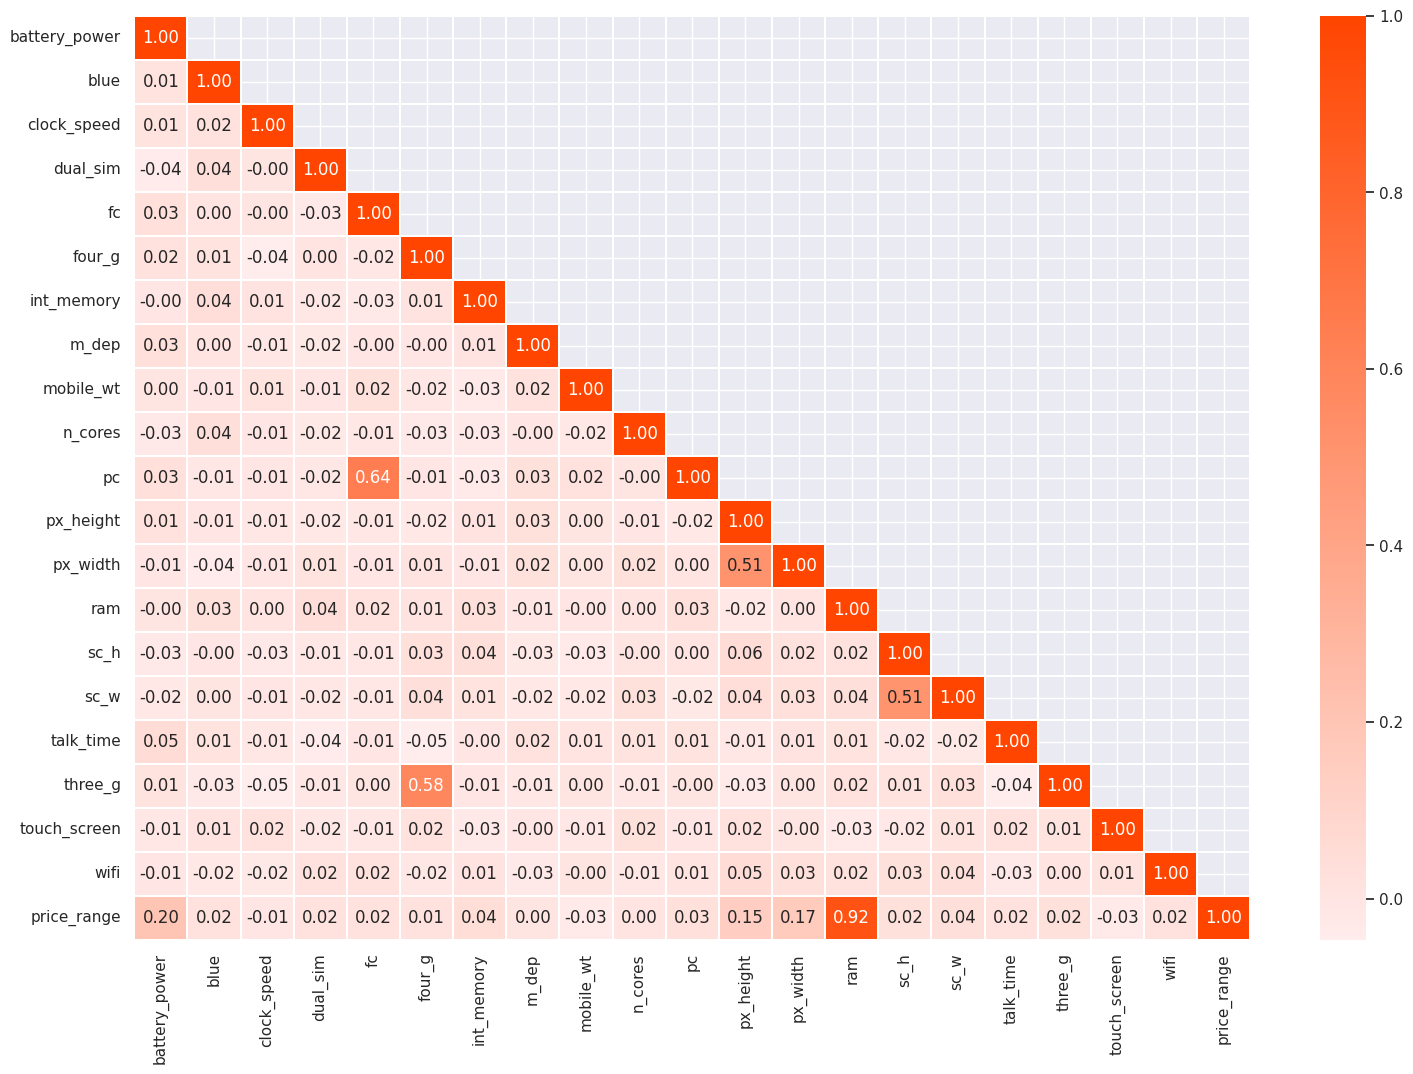

In [16]:
# Define a colormap
orangered_cmap = LinearSegmentedColormap.from_list('orangered', ['#FFECEC','orangered'])

# Calculation of the Spearman correlation
target = 'price_range'
df_ordered = pd.concat([df.drop(target,axis=1), df[target]],axis=1)
corr = df_ordered.corr()

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(18,12))
sns.heatmap(corr, mask=mask, annot=True, cmap=orangered_cmap, fmt='.2f', linewidths=0.2)
plt.show()

Conclusions:

* `price_range` is highly correlated with `ram` (ρ = 0.92).
* `price_range` has a low correlation value with the rest of the features, but this cannot be used as a criterion to remove these features since the pearson correlation only expresses the linear relationship between two variables.
* Among the features, two features ‍‍‍‍‍‍`pc` and `fc` have the highest correlation with each other (ρ = 0.64).

### drop-column Feature Importance

Note:

* Drop-column Feature Importance method does not reflect to the intrinsic predictive value of a feature by itself but how important this feature is __for a particular model__.

Note:

* In this project, the target contains 4 classes and the it is __completely balanced__. Also, none of the classes is of particular importance compared to the other. Therefore, in this project, __accuracy__ can be a good metric to measure the performance of the models.
    
    
* If we want to evaluate the performance of our models using precision, recall, and f1-score, since our dataset is multi-class and each class is equally important and needs to be evaluated separately, we use __macro-level metrics__.

Next, we will implement Drop-column Feature Importance Technique through a function using __cloning__:

In [17]:
def drop_column_importance(model, X_train, y_train, random_state=0):
    """
    Estimate the feature importance of a given machine learning model using the Drop-column Feature Importance technique.

    Parameters
    ----------
    model : object
        A scikit-learn compatible estimator object.
    X_train : pandas.DataFrame
        The training dataset containing the feature variables.
    y_train : pandas.Series
        The training dataset containing the target variable.
    random_state : int, optional (default=0)
        The random seed used to initialize the model's random state.

    Returns
    -------
    pandas.DataFrame
        A DataFrame with two columns, 'feature' and 'feature importance', where the latter represents the decrease in model
        performance when a feature is removed. The DataFrame is sorted in descending order by 'feature importance'.
    """

    # list containing feature importances
    importances = []
    # Clone the model
    model_clone = clone(model)
    # Set random_state for comparability
    model_clone.random_state = random_state
    # Train the model
    model_clone.fit(X_train, y_train)
    # Create the cross-validation object using StratifiedKFold
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    # Score the benchmark model using cross-validation
    benchmark_score = cross_val_score(model_clone, X_train, y_train, cv=cv, scoring='accuracy').mean()


    # Iterate over all features and store feature importance
    for col in X_train.columns:
        # Clone the model
        model_clone = clone(model)
        # Set random_state for comparability
        model_clone.random_state = random_state
        # Traint the model on the the dataset with a single feature removed
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        # Score the droped-column model
        drop_column_score = cross_val_score(model_clone, X_train.drop(col,axis=1), y_train, cv=cv, scoring='accuracy').mean()
        # Store feature importance which is defined as the difference between the benchmark and the new model score
        importances.append(benchmark_score - drop_column_score)

    # Return the features along with their importances in the form of a dataframe
    importances_df = pd.DataFrame({'feature': X_train.columns, 'feature importance': importances}) \
                     .sort_values('feature importance', ascending = False).reset_index(drop = True)

    return importances_df

Define a function to __visualize__ the results of __Drop-column Feature Importance technique__ using bar charts:

In [19]:
def drop_column_importance_plot(model, X_train, y_train):
    """
    Visualize the feature importance of a given machine learning model using the Drop-column Feature Importance technique.

    Parameters
    ----------
    model : object
        A scikit-learn compatible estimator object.
    X_train : pandas.DataFrame
        The training dataset containing the feature variables.
    y_train : pandas.Series
        The training dataset containing the target variable.

    Returns
    -------
    None
        Displays a horizontal bar plot showing the feature importances based on the drop-column technique.
    """

    # Call drop-column feature importance function
    df_drop_column = drop_column_importance(model, X_train, y_train, random_state=0)
    # Rename columns
    df_drop_column.columns = ['Feature', 'Feature Importance']

    # Plot barchart
    plt.figure(figsize=(12,10))
    sns.barplot(data=df_drop_column, x='Feature Importance', y='Feature', orient='h', color='orangered')
    plt.title('Drop Column Feature Importance', fontsize=20)
    plt.show()

In the next steps, we will use these functions before building our final model to detect redundant features.

## Decision Tree Model Building

In [20]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Macro Precision','Macro Recall','Macro F1-score'],
                          columns = [model_name])

    result = (result * 100).round(2).astype(str) + '%'
    return result

Now we define a function that provides a complete report of the model's performance on the training and test data, plus the confusin_matrix of the model on the test data and the summary of the model performance using the above function:

In [21]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports and confusion matrix
    '''
    # Set font scale
    sns.set(font_scale=1.5)

    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    print('\n')

    # Create figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=90, figsize=(12, 5))


    # Report desired results as a summary in the form of a table
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax1.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 4.2)
    table.set_fontsize(12)
    ax1.axis('tight')
    # Hide the axes
    ax1.axis('off')
    # set the title
    ax1.set_title('{} Performance Summary on Test Data'.format(model_name), fontsize=18)
    # Modify color
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('orangered')

    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=orangered_cmap, ax=ax2)
    ax2.set_title('Confusion Matrix for Test Data')
    ax2.grid(False)

    plt.tight_layout()
    plt.show()

### Noise Treatment using KNN Imputer
    
__Decision Tree__ is a __noise-sensitive__ algorithm and __prone to overfitting__, especially when trained with noisy data. Therefore, we need to clear the data set. Since the number of noise values detected in the dataset is high, we cannot remove the corresponding rows from the dataset. On the other hand, `px_height` and `sc_w` containing noise values, are considered important features in target estimation and we cannot remove any of them from the dataset. Therefore, we use __KNNImputer__ to impute these noise values:

### KNN Imputer:
    
* __KNN Imputer__ is a machine learning technique used to __impute or fill in missing values and noise values__ in a dataset. The technique works by finding the __k-nearest neighbors__ of a data point with missing values and then imputing the missing values with the __average__ of those neighbors.

In [22]:
# Make a copy of dataset
df_denoised = df.copy()

# Replace the noise values with NaN
df_denoised.loc[sc_w_NoiseIndex,'sc_w'] = np.nan
df_denoised.loc[px_height_NoiseIndex,'px_height'] = np.nan

# Create a KNN imputer object with k=2
imputer = KNNImputer(n_neighbors=2)

# Impute the noise values
imputed_data = imputer.fit_transform(df_denoised)

# Convert array to dataframe
df_denoised = pd.DataFrame(imputed_data, columns=df_denoised.columns)

# Define the features (X) and the output labels (y)
X_denoised = df_denoised.drop('price_range', axis=1)
df_denoised['price_range'] = df_denoised['price_range'].astype(int)
y = df_denoised['price_range']

### Decision Tree Hyperparameter Tuning

In [23]:
def tune_hyperparameters(clf, param_grid, X_train, y_train):
    """
    Tunes the hyperparameters of a classifier using GridSearchCV and cross-validation.

    Parameters:
    ----------
    clf (estimator): A classifier object that implements the estimator interface.
    param_grid (dict): A dictionary of hyperparameter values to search over using GridSearchCV.
    X_train (array-like): The training input samples.
    y_train (array-like): The target values for the training input samples.

    Returns:
    --------
    estimator: The best classifier with the optimal hyperparameters.

    The function uses GridSearchCV to search over a specified hyperparameter grid and
    cross-validation using StratifiedKFold to evaluate the performance of different hyperparameter
    combinations. The function returns the best classifier model with the optimal hyperparameters.
    """

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    print("Best hyperparameters:\n", clf_grid.best_params_)

    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_

Define the hyperparameters grid for search:

In [24]:
# Define the hyperparameter grid
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': np.arange(1, 15),
              'min_samples_split': np.arange(2, 10),
              'min_samples_leaf': np.arange(1, 10),
              'max_features': [None, 'sqrt', 'log2']}

Let's call tune_hyperparameters function for hyperparameter tuning:

In [26]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X_denoised, y, test_size=0.2, random_state=0, stratify=y)

# Create a  Decision Tree Classifier object
dt = DecisionTreeClassifier(random_state=0)

# Find the best classifier with the optimal hyperparameters
dt_optimized = tune_hyperparameters(dt, param_grid, X_train, y_train)

Best hyperparameters:
 {'criterion': 'gini', 'max_depth': np.int64(9), 'max_features': None, 'min_samples_leaf': np.int64(3), 'min_samples_split': np.int64(8)}


### Decision Tree Feature Subset Selection

 By removing irrelevant features from the dataset using feature selection techniques, we can simplify our decision tree and reduce its complexity, which can lead to improve the accuracy of the model by reducing model overfitting.

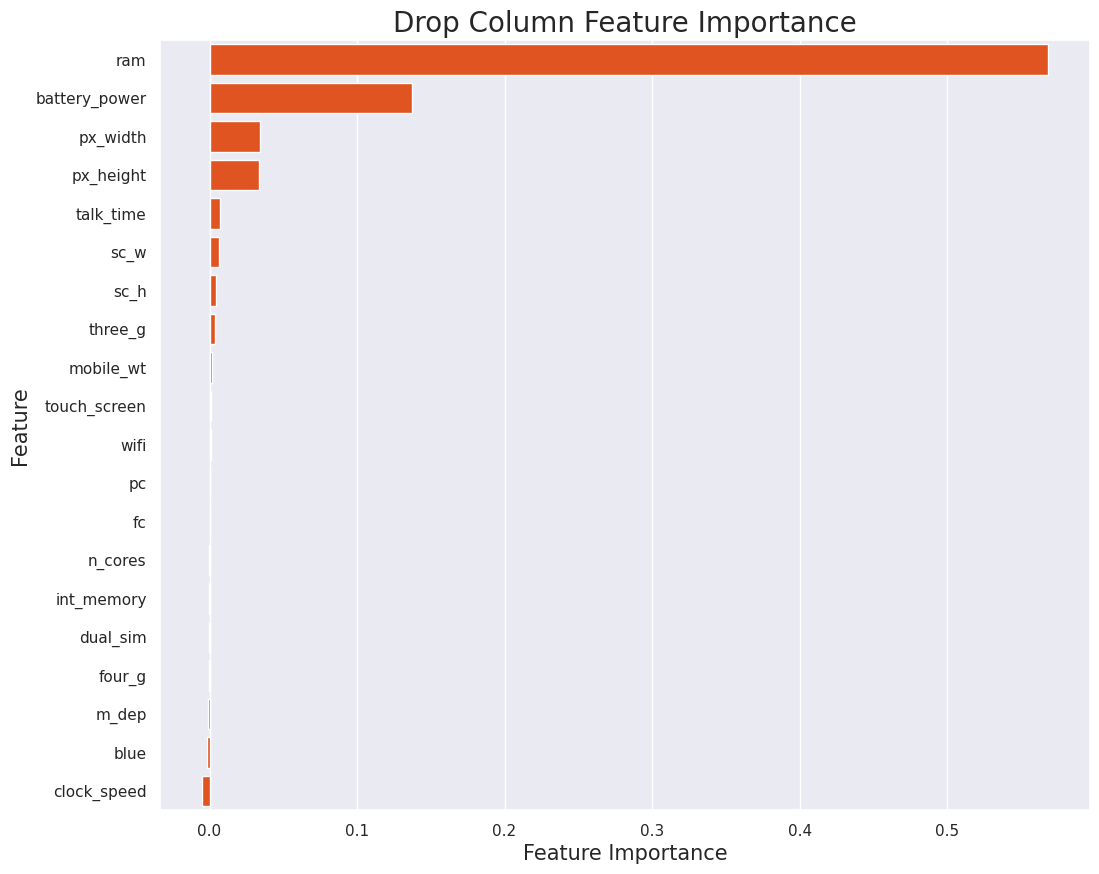

In [27]:
drop_column_importance_plot(dt_optimized, X_train, y_train)

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #F8EBEE; font-size:100%; text-align:left">

In the Drop-Column feature importance output results, several features with negative importance are observed. Removing these features improves the performance of the model. Let's filter our the dataset:

In [28]:
# Find Important features with positive feature_importance value
feature_importances = drop_column_importance(dt_optimized, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0.01]['feature']  # Threshold value of 0.01

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

We can see the __remaining features__ in the dataset (relavant features):

In [29]:
pd.DataFrame(selected_features)

,feature
0,ram
1,battery_power
2,px_width
3,px_height


Let's tune the hyperparameters of our model again after removing the irrelevant features:

In [30]:
# Create a  Decision Tree Classifier object
dt = DecisionTreeClassifier(random_state=0)

# Find the best classifier with the optimal hyperparameters
dt_optimized = tune_hyperparameters(dt, param_grid, X_train, y_train)

Best hyperparameters:
 {'criterion': 'gini', 'max_depth': np.int64(9), 'max_features': None, 'min_samples_leaf': np.int64(3), 'min_samples_split': np.int64(7)}


### Decision Tree Model Evaluation
Let's evaluate our Decision Tree performance using model_evaluation function:


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       400
           1       0.96      0.94      0.95       400
           2       0.91      0.97      0.94       400
           3       0.98      0.94      0.96       400

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       100
           1       0.85      0.87      0.86       100
           2       0.82      0.85      0.83       100
           3       0.92      0.86      0.89       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88 

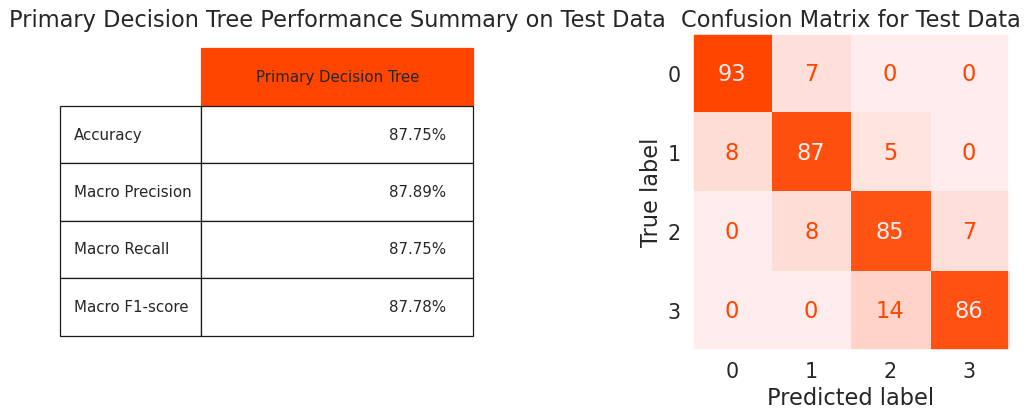

In [ ]:
model_evaluation(dt_optimized, X_train, X_test, y_train, y_test, 'Primary Decision Tree')

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #F8EBEE; font-size:110%; text-align:left">

If we compare the accuracy obtained on both training and test sets, we see __a decrease of 7% on the accuracy of test set compared to training set__, which shows that __the model is fairly overfit.__ Overfitting of the model is due to its high variance, and in the following, we try to prevent the model from overfitting by applying a small change in the value of hyperparameters, hoping that the performance of the model will improve on the test data.

How each Decision Tree Classifier Hyperparameter Can Reduce Model Variance?

* __Maximum depth (max_depth)__ - This hyperparameter controls the maximum depth of the decision tree. By limiting the depth of the tree, we can prevent the model from becoming too complex and overfitting the training data, which can help reduce model variance.
* __Minimum samples for a split (min_samples_split)__ - This hyperparameter specifies the minimum number of samples required to split an internal node. By increasing this value, we can prevent the model from splitting on small, noisy subsets of the data, which can help reduce model variance.
* __Minimum samples for a leaf (min_samples_leaf)__ - This hyperparameter specifies the minimum number of samples required to be at a leaf node. By increasing this value, we can prevent the model from creating small, isolated leaves that capture noise in the training data, which can help reduce model variance.

Among the optimal values obtained for hyperparameters, we only decrease the value of `max_depth` from 9 to 8 in order to partially reduce the variance of the model:

In [ ]:
# Build decision tree classifier considering the obtained optimal values for hyperparameters
dt_final = DecisionTreeClassifier(criterion='gini',
                                  max_depth=8,
                                  max_features=None,
                                  min_samples_leaf=3,
                                  min_samples_split=7,
                                  random_state=0)

# Train the final decision tree classifier
dt_final.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=7,
                       random_state=0)

Let's evaluate our final Decision Tree classifier:


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       400
           1       0.95      0.94      0.94       400
           2       0.93      0.94      0.94       400
           3       0.97      0.95      0.96       400

    accuracy                           0.95      1600
   macro avg       0.96      0.95      0.96      1600
weighted avg       0.96      0.95      0.96      1600


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       100
           1       0.86      0.88      0.87       100
           2       0.83      0.86      0.85       100
           3       0.94      0.87      0.90       100

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89 

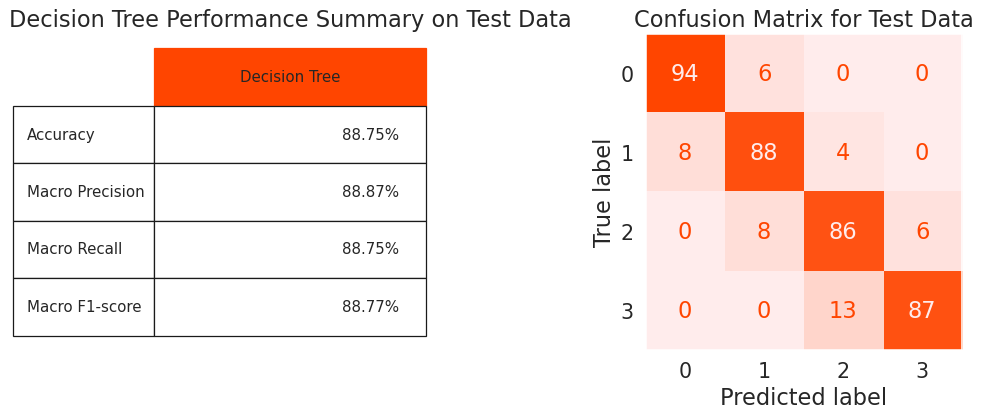

In [ ]:
model_evaluation(dt_final, X_train, X_test, y_train, y_test, 'Decision Tree')

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #F8EBEE; font-size:120%; text-align:left">

As can be seen, by using __only 4 features__ from the dataset in modeling (`ram`, `battery_power`, `px_width` and `px_height`), we achieved almost 89% accuracy

In [ ]:
# Save the final performance of Decision Tree classifier
dt_result = metrics_calculator(dt_final, X_test, y_test, 'Decision Tree')
print(dt_result)

                Decision Tree
Accuracy               88.75%
Macro Precision        88.87%
Macro Recall           88.75%
Macro F1-score         88.77%
